<a href="https://colab.research.google.com/github/HienDT27/Rabbit-Challenge/blob/master/%E3%80%90%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92_Day_02%E3%80%912_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [0]:
import sys
sys.path.append('/content/drive/My Drive/【E資格】深層学習/DNN_code')
sys.path.append('/content/drive/My Drive/【E資格】深層学習/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10333333333333333
                : 10. 正答率(テスト) = 0.1114
Generation: 20. 正答率(トレーニング) = 0.25333333333333335
                : 20. 正答率(テスト) = 0.1888
Generation: 30. 正答率(トレーニング) = 0.3933333333333333
                : 30. 正答率(テスト) = 0.2926
Generation: 40. 正答率(トレーニング) = 0.5066666666666667
                : 40. 正答率(テスト) = 0.3645
Generation: 50. 正答率(トレーニング) = 0.54
                : 50. 正答率(テスト) = 0.4017
Generation: 60. 正答率(トレーニング) = 0.6433333333333333
                : 60. 正答率(テスト) = 0.4549
Generation: 70. 正答率(トレーニング) = 0.6766666666666666
                : 70. 正答率(テスト) = 0.493
Generation: 80. 正答率(トレーニング) = 0.7
                : 80. 正答率(テスト) = 0.5123
Generation: 90. 正答率(トレーニング) = 0.7633333333333333
                : 90. 正答率(テスト) = 0.5655
Generation: 100. 正答率(トレーニング) = 0.8066666666666666
                : 100. 正答率(テスト) = 0.603
Generation: 110. 正答率(トレーニング) = 0.8333333333333334
                : 110. 正答率(テスト) = 0.6185
Generation: 120. 正答率(トレーニング) = 0.853

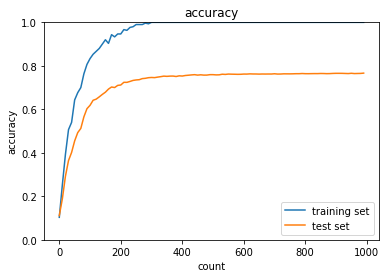

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay


### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15666666666666668
                : 10. 正答率(テスト) = 0.1072
Generation: 20. 正答率(トレーニング) = 0.21
                : 20. 正答率(テスト) = 0.1521
Generation: 30. 正答率(トレーニング) = 0.25
                : 30. 正答率(テスト) = 0.1847
Generation: 40. 正答率(トレーニング) = 0.2633333333333333
                : 40. 正答率(テスト) = 0.2146
Generation: 50. 正答率(トレーニング) = 0.35
                : 50. 正答率(テスト) = 0.2584
Generation: 60. 正答率(トレーニング) = 0.4033333333333333
                : 60. 正答率(テスト) = 0.3061
Generation: 70. 正答率(トレーニング) = 0.51
                : 70. 正答率(テスト) = 0.3894
Generation: 80. 正答率(トレーニング) = 0.6066666666666667
                : 80. 正答率(テスト) = 0.4618
Generation: 90. 正答率(トレーニング) = 0.6466666666666666
                : 90. 正答率(テスト) = 0.5026
Generation: 100. 正答率(トレーニング) = 0.68
                : 100. 正答率(テスト) = 0.5319
Generation: 110. 正答率(トレーニング) = 0.6966666666666667
                : 110. 正答率(テスト) = 0.5609
Generation: 120. 正答率(トレーニング) = 0.7433333333333333
                : 120. 正答率

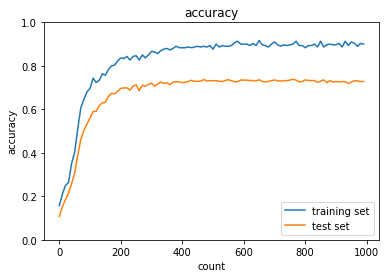

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.57
                : 10. 正答率(テスト) = 0.4113
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.2125
Generation: 30. 正答率(トレーニング) = 0.7633333333333333
                : 30. 正答率(テスト) = 0.6221
Generation: 40. 正答率(トレーニング) = 0.5566666666666666
                : 40. 正答率(テスト) = 0.4106
Generation: 50. 正答率(トレーニング) = 0.83
                : 50. 正答率(テスト) = 0.6661
Generation: 60. 正答率(トレーニング) = 0.8533333333333334
                : 60. 正答率(テスト) = 0.7038
Generation: 70. 正答率(トレーニング) = 0.9166666666666666
                : 70. 正答率(テスト) = 0.7435
Generation: 80. 正答率(トレーニング) = 0.76
                : 80. 正答率(テスト) = 0.6207
Generation: 90. 正答率(トレーニング) = 0.8366666666666667
                : 90. 正答率(テスト) = 0.6778
Generation: 100. 正答率(トレーニング) = 0.8466666666666667
                : 100. 正答率(テスト) = 0.6745
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.6683
Generation: 120. 正答率(トレーニング) = 0.85
                : 120. 正答率

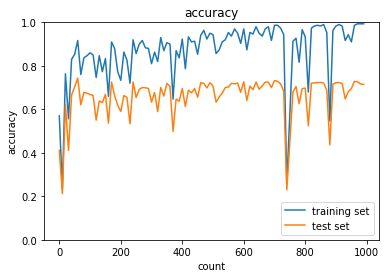

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] L2のweigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19333333333333333
                : 10. 正答率(テスト) = 0.1481
Generation: 20. 正答率(トレーニング) = 0.2633333333333333
                : 20. 正答率(テスト) = 0.1896
Generation: 30. 正答率(トレーニング) = 0.34
                : 30. 正答率(テスト) = 0.233
Generation: 40. 正答率(トレーニング) = 0.38
                : 40. 正答率(テスト) = 0.2716
Generation: 50. 正答率(トレーニング) = 0.39
                : 50. 正答率(テスト) = 0.2999
Generation: 60. 正答率(トレーニング) = 0.4166666666666667
                : 60. 正答率(テスト) = 0.3187
Generation: 70. 正答率(トレーニング) = 0.42333333333333334
                : 70. 正答率(テスト) = 0.3335
Generation: 80. 正答率(トレーニング) = 0.4266666666666667
                : 80. 正答率(テスト) = 0.3446
Generation: 90. 正答率(トレーニング) = 0.43333333333333335
                : 90. 正答率(テスト) = 0.3509
Generation: 100. 正答率(トレーニング) = 0.42333333333333334
                : 100. 正答率(テスト) = 0.3536
Generation: 110. 正答率(トレーニング) = 0.43333333333333335
                : 110. 正答率(テスト) = 0.3548
Generation: 120. 正答率(トレーニング) = 0.433333333333

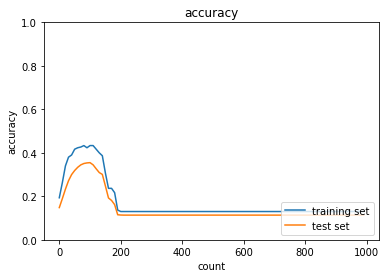

In [6]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.5
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] L1のweigth_decay_lambdaの値を変更して正則化の強さを確認しよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4866666666666667
                : 10. 正答率(テスト) = 0.3883
Generation: 20. 正答率(トレーニング) = 0.4533333333333333
                : 20. 正答率(テスト) = 0.3414
Generation: 30. 正答率(トレーニング) = 0.14666666666666667
                : 30. 正答率(テスト) = 0.1211
Generation: 40. 正答率(トレーニング) = 0.44333333333333336
                : 40. 正答率(テスト) = 0.3653
Generation: 50. 正答率(トレーニング) = 0.44
                : 50. 正答率(テスト) = 0.3516
Generation: 60. 正答率(トレーニング) = 0.31666666666666665
                : 60. 正答率(テスト) = 0.2733
Generation: 70. 正答率(トレーニング) = 0.13333333333333333
                : 70. 正答率(テスト) = 0.1136
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1

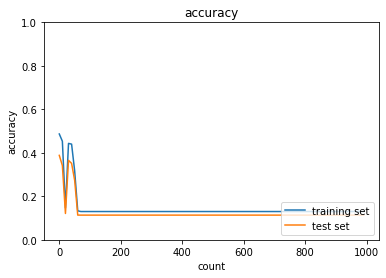

In [7]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.02
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [0]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10333333333333333
                : 10. 正答率(テスト) = 0.1067
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1186
Generation: 30. 正答率(トレーニング) = 0.17333333333333334
                : 30. 正答率(テスト) = 0.1369
Generation: 40. 正答率(トレーニング) = 0.22
                : 40. 正答率(テスト) = 0.1583
Generation: 50. 正答率(トレーニング) = 0.24333333333333335
                : 50. 正答率(テスト) = 0.168
Generation: 60. 正答率(トレーニング) = 0.26
                : 60. 正答率(テスト) = 0.1758
Generation: 70. 正答率(トレーニング) = 0.2866666666666667
                : 70. 正答率(テスト) = 0.1852
Generation: 80. 正答率(トレーニング) = 0.33
                : 80. 正答率(テスト) = 0.2113
Generation: 90. 正答率(トレーニング) = 0.35
                : 90. 正答率(テスト) = 0.2334
Generation: 100. 正答率(トレーニング) = 0.36333333333333334
                : 100. 正答率(テスト) = 0.2337
Generation: 110. 正答率(トレーニング) = 0.36666666666666664
                : 110. 正答率(テスト) = 0.2431
Generation: 120. 正答率(トレーニング) = 0.37333333333333335
                : 120.

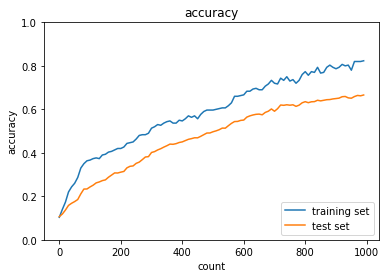

In [9]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.1016
Generation: 20. 正答率(トレーニング) = 0.11666666666666667
                : 20. 正答率(テスト) = 0.1155
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1293
Generation: 40. 正答率(トレーニング) = 0.13333333333333333
                : 40. 正答率(テスト) = 0.1424
Generation: 50. 正答率(トレーニング) = 0.13333333333333333
                : 50. 正答率(テスト) = 0.1453
Generation: 60. 正答率(トレーニング) = 0.14666666666666667
                : 60. 正答率(テスト) = 0.156
Generation: 70. 正答率(トレーニング) = 0.15666666666666668
                : 70. 正答率(テスト) = 0.1582
Generation: 80. 正答率(トレーニング) = 0.16
                : 80. 正答率(テスト) = 0.1599
Generation: 90. 正答率(トレーニング) = 0.16666666666666666
                : 90. 正答率(テスト) = 0.1613
Generation: 100. 正答率(トレーニング) = 0.18
                : 100. 正答率(テスト) = 0.1568
Generation: 110. 正答率(トレーニング) = 0.17333333333333334
                : 110. 正答率(テスト) = 0.1528
Generation: 120. 正答率(トレーニング) = 0.176666666

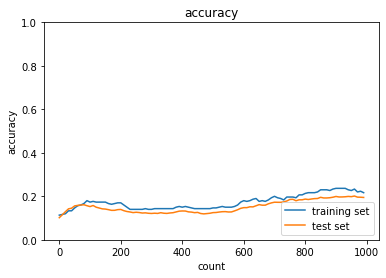

In [10]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1283
Generation: 20. 正答率(トレーニング) = 0.14333333333333334
                : 20. 正答率(テスト) = 0.1221
Generation: 30. 正答率(トレーニング) = 0.13666666666666666
                : 30. 正答率(テスト) = 0.1178
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1138
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1136
Generation: 60. 正答率(トレーニング) = 0.21666666666666667
                : 60. 正答率(テスト) = 0.1923
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.118
Generation: 80. 正答率(トレーニング) = 0.18333333333333332
                : 80. 正答率(テスト) = 0.176
Generation: 90. 正答率(トレーニング) = 0.24
                : 90. 正答率(テスト) = 0.2083
Generation: 100. 正答率(トレーニング) = 0.24333333333333335
                : 100. 正答率(テスト) = 0.2073
Generation: 110. 正答率(トレーニング) = 0.24333333333333335
                : 110. 正答率(テスト) = 0.2062
Generation: 120. 正答率(トレーニング) = 0.24333333333333335
       

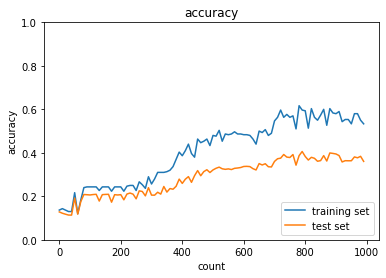

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#ptimizer = optimizer.SGD(learning_rate=0.01)
#optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.115
Generation: 20. 正答率(トレーニング) = 0.19333333333333333
                : 20. 正答率(テスト) = 0.1374
Generation: 30. 正答率(トレーニング) = 0.20666666666666667
                : 30. 正答率(テスト) = 0.1679
Generation: 40. 正答率(トレーニング) = 0.25666666666666665
                : 40. 正答率(テスト) = 0.203
Generation: 50. 正答率(トレーニング) = 0.30666666666666664
                : 50. 正答率(テスト) = 0.2378
Generation: 60. 正答率(トレーニング) = 0.34
                : 60. 正答率(テスト) = 0.2681
Generation: 70. 正答率(トレーニング) = 0.36666666666666664
                : 70. 正答率(テスト) = 0.3028
Generation: 80. 正答率(トレーニング) = 0.3933333333333333
                : 80. 正答率(テスト) = 0.3327
Generation: 90. 正答率(トレーニング) = 0.42
                : 90. 正答率(テスト) = 0.3488
Generation: 100. 正答率(トレーニング) = 0.45
                : 100. 正答率(テスト) = 0.3719
Generation: 110. 正答率(トレーニング) = 0.46
                : 110. 正答率(テスト) = 0.3835
Generation: 120. 正答率(トレーニング) = 0.48
                : 120. 正答率(テスト) = 0.38

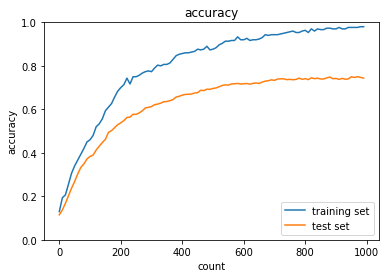

In [14]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()